In [2]:
## import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics, svm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score

## neural network library
from keras.models import Sequential
from keras.layers import Dense, Dropout
from mlxtend.plotting import plot_confusion_matrix



In [9]:
##load the data
heart_prediction = pd.read_csv('heart_records.csv')

In [10]:
heart_prediction

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [11]:
heart_prediction['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [12]:
heart_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


array([[<AxesSubplot: title={'center': 'age'}>,
        <AxesSubplot: title={'center': 'anaemia'}>,
        <AxesSubplot: title={'center': 'creatinine_phosphokinase'}>,
        <AxesSubplot: title={'center': 'diabetes'}>],
       [<AxesSubplot: title={'center': 'ejection_fraction'}>,
        <AxesSubplot: title={'center': 'high_blood_pressure'}>,
        <AxesSubplot: title={'center': 'platelets'}>,
        <AxesSubplot: title={'center': 'serum_creatinine'}>],
       [<AxesSubplot: title={'center': 'serum_sodium'}>,
        <AxesSubplot: title={'center': 'sex'}>,
        <AxesSubplot: title={'center': 'smoking'}>,
        <AxesSubplot: title={'center': 'time'}>],
       [<AxesSubplot: title={'center': 'DEATH_EVENT'}>, <AxesSubplot: >,
        <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

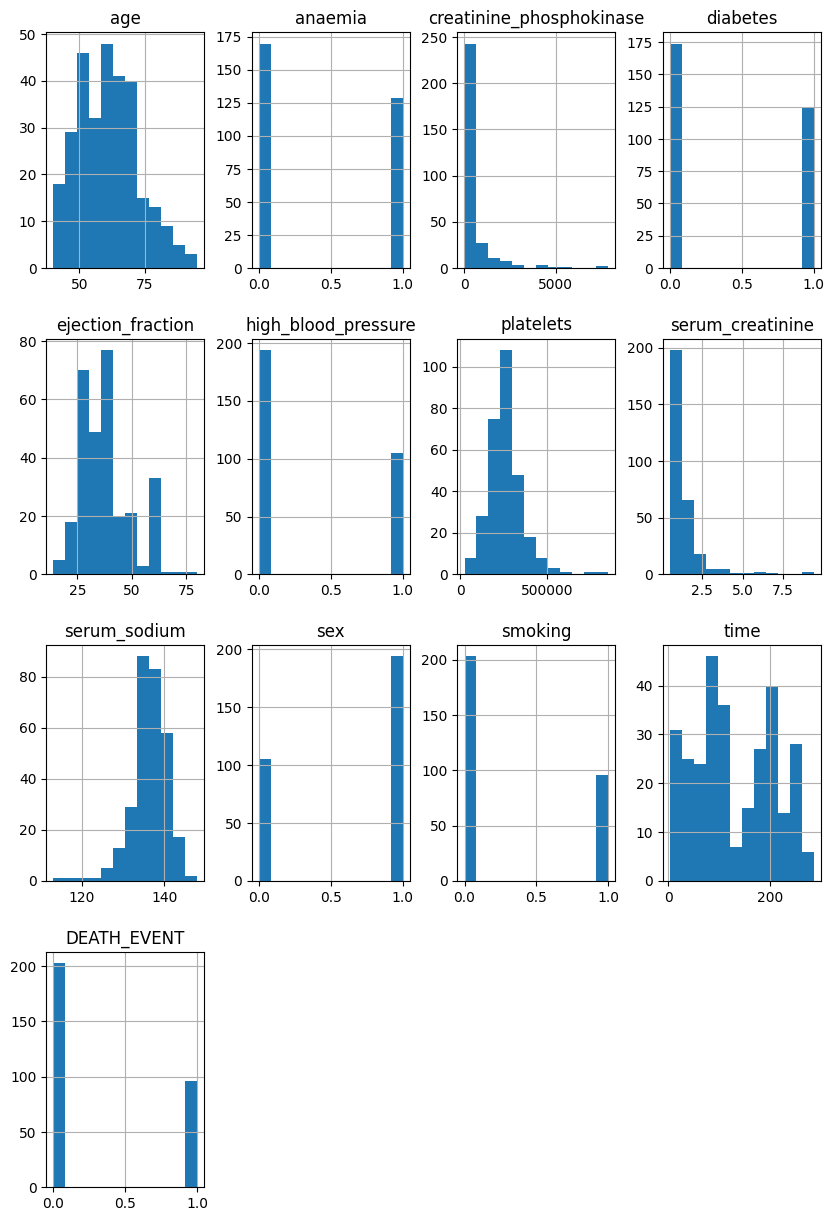

In [19]:
heart_prediction.hist(bins =12, figsize=(10,15))

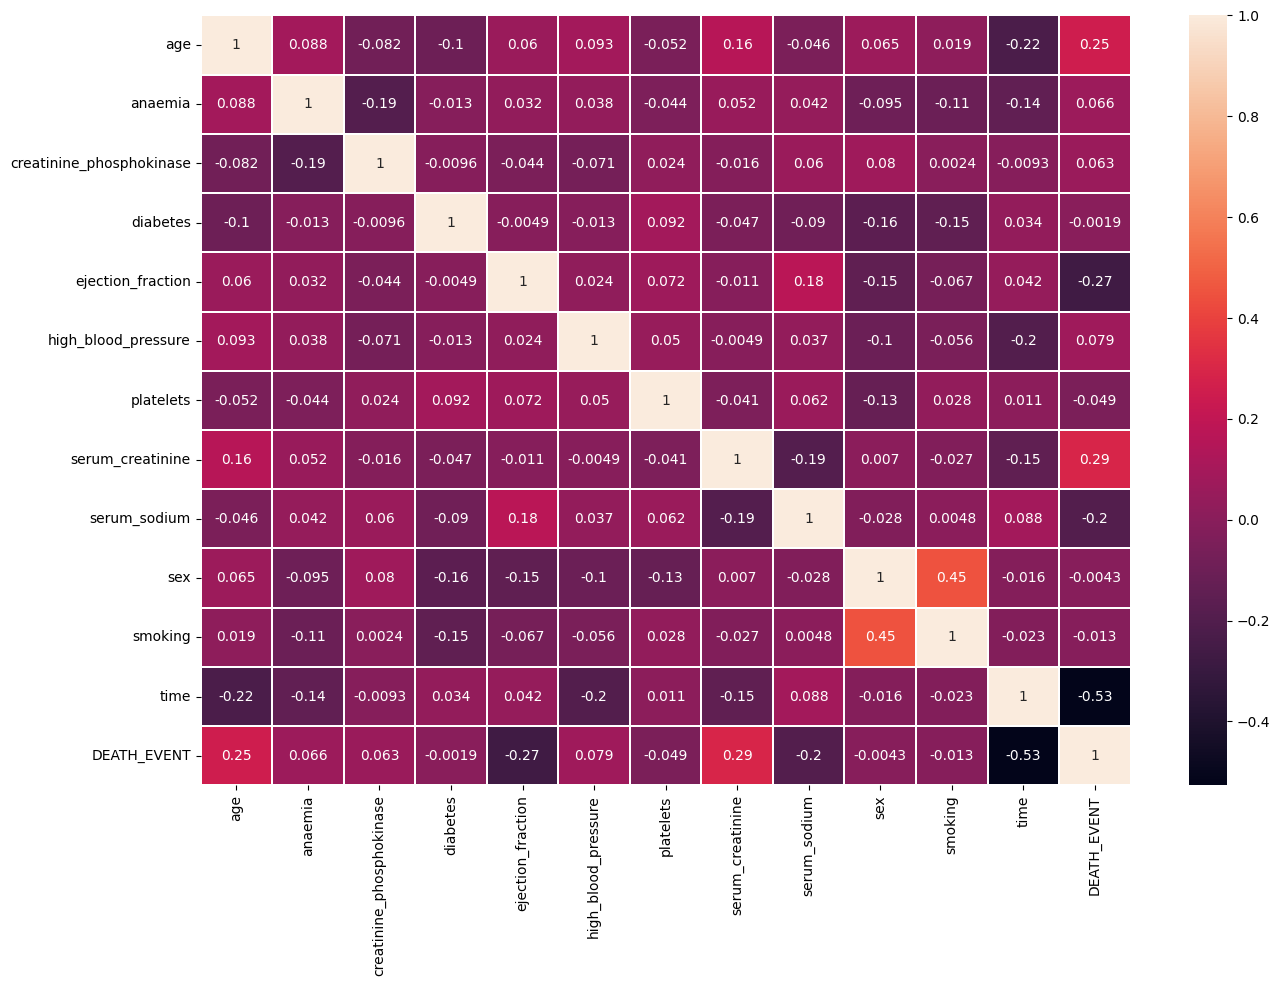

In [21]:
sns.heatmap(heart_prediction.corr(),annot=True,linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(15,10)
plt.show()

In [23]:
## split the data into independent and dependent variable
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values


In [24]:
## split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 32)

In [10]:
## TRAIN THE LOGISTIC REGRESSION
model_LR = LogisticRegression()
model_LR.fit(X_train, y_train)

LogisticRegression()

In [11]:
##  make the prediction
pred_LR = model_LR.predict(X_test)
pd.DataFrame({'Actual': y_test, 'Predicted': pred_LR})

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,1,0
4,0,1
5,0,0
6,0,1
7,0,0
8,0,0
9,0,0


In [12]:
## evaluate the model accuracy
accuracy_LR = accuracy_score(y_test, pred_LR)

## CONFUSION MATRIX
conf_mat = confusion_matrix(y_test, pred_LR)

print(accuracy_LR)
print(conf_mat)


0.7666666666666667
[[36  5]
 [ 9 10]]


In [13]:
## naives bayes
model_NB = GaussianNB()
model_NB.fit(X_train, y_train)

GaussianNB()

In [14]:
## predict the test set
y_pred_NB = model_NB.predict(X_test)
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_NB})

,Actual,Predicted
0,0,1
1,0,0
2,0,0
3,1,1
4,0,0
5,0,0
6,0,1
7,0,0
8,0,0
9,0,0


In [15]:
## Evaluate the naive bayes model
accuracy_NB = accuracy_score(y_test, y_pred_NB)
conf_mat_NB = confusion_matrix(y_test, y_pred_NB)


print(accuracy_NB)
print(conf_mat_NB)

0.7666666666666667
[[36  5]
 [ 9 10]]


In [16]:
## K-Nearest Neighbors
Knn_model = KNeighborsClassifier(n_neighbors=5)
##train my model
Knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [17]:
## Make prediction
y_pred_knn = Knn_model.predict(X_test)
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_knn})

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,1,1
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [18]:
## Evaluate the naive bayes model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_mat_knn = confusion_matrix(y_test, y_pred_knn)


print(accuracy_knn)
print(conf_mat_knn)

0.7833333333333333
[[40  1]
 [12  7]]


In [25]:
## SVM
#Create a SVM Classifier
clfLinear = svm.SVC(kernel='linear')
clfsigmoid = svm.SVC(kernel='sigmoid') 
clfrbf = svm.SVC(kernel='rbf') 

In [26]:
#Train the model using the training sets
clfLinear.fit(X_train, y_train)
clfsigmoid.fit(X_train, y_train)
clfrbf.fit(X_train, y_train)

SVC()

In [27]:
#Predict the response for test dataset
y_pred_linear = clfLinear.predict(X_test)
y_pred_sigmoid = clfsigmoid.predict(X_test)
y_pred_rbf = clfrbf.predict(X_test)


In [28]:
## make a dataframe prediction for linear kernel
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_linear})

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,1,1
4,0,1
5,0,0
6,0,1
7,0,0
8,0,0
9,0,0


In [29]:
## make a dataframe prediction for linear kernel
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_sigmoid})

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,1,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [37]:
## make a dataframe prediction for linear kernel
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rbf})

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,1,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [30]:
#Calculate the accuracy of our model
print("Linear Kernel Accuracy:",metrics.accuracy_score(y_test, y_pred_linear))
print("Sigmoid kernel Accuracy:",metrics.accuracy_score(y_test, y_pred_sigmoid))
print("rbf kernelAccuracy:",metrics.accuracy_score(y_test, y_pred_rbf))

Linear Kernel Accuracy: 0.8166666666666667
Sigmoid kernel Accuracy: 0.6833333333333333
rbf kernelAccuracy: 0.6833333333333333


In [31]:
## confussion matrix for the kernels
conf_mat_linear = confusion_matrix(y_test, y_pred_linear)
conf_mat_sigmoid = confusion_matrix(y_test, y_pred_sigmoid)
conf_mat_rbf = confusion_matrix(y_test, y_pred_rbf)

print(conf_mat_linear)
print(conf_mat_sigmoid)
print(conf_mat_rbf)

[[36  5]
 [ 6 13]]
[[41  0]
 [19  0]]
[[41  0]
 [19  0]]


<AxesSubplot: >

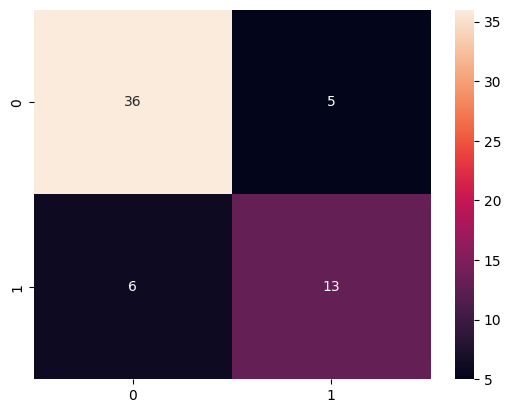

In [40]:
sns.heatmap(conf_mat_linear, annot=True, fmt='.0f')

In [41]:
print(classification_report(y_test, y_pred_linear))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87        41
           1       0.72      0.68      0.70        19

    accuracy                           0.82        60
   macro avg       0.79      0.78      0.79        60
weighted avg       0.81      0.82      0.82        60



In [42]:
auc = roc_auc_score(y_test, y_pred_linear)
print('AUC: %f' %auc)

AUC: 0.781130


In [42]:
auc = roc_auc_score(y_test, y_pred_linear)
print('AUC: %f' %auc)

AUC: 0.781130


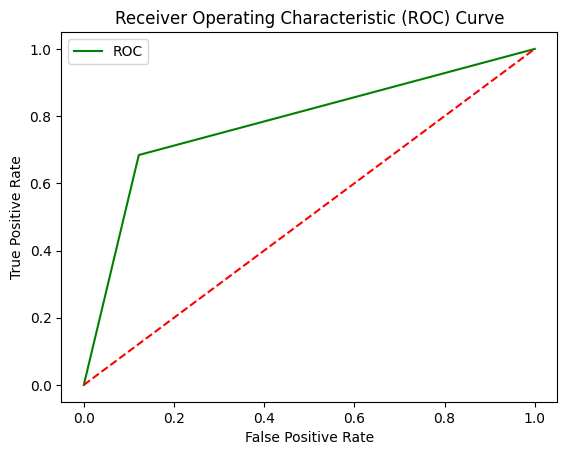

In [43]:
fpr, tpr = roc_curve(y_test, y_pred_linear)[0:2]

plt.plot(fpr, tpr, color='green', label='ROC')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [39]:
## Neural Network
model = Sequential()

##set up the layers
## input layer
model.add(Dense(units= 15, kernel_initializer= 'uniform', activation = 'relu', input_dim = 12))
## hidden layer
model.add(Dense(units= 5, kernel_initializer= 'uniform', activation = 'relu'))
##regularization
model.add(Dropout(0.2))
##output layer
model.add(Dense(units= 1, kernel_initializer= 'uniform', activation = 'sigmoid'))

## compiling the ANN

model.compile(optimizer = 'adam', loss ='binary_crossentropy', metrics = ['accuracy'])



In [62]:
train_nn = model.fit(X_train, y_train, batch_size=64, epochs=50, validation_split=0.3)

Epoch 1/50
3/3 [==============================] - 0s 47ms/step - loss: 0.6426 - accuracy: 0.6527 - val_loss: 0.6120 - val_accuracy: 0.7361
Epoch 2/50
3/3 [==============================] - 0s 27ms/step - loss: 0.6409 - accuracy: 0.6527 - val_loss: 0.6113 - val_accuracy: 0.7361
Epoch 3/50
3/3 [==============================] - 0s 18ms/step - loss: 0.6517 - accuracy: 0.6527 - val_loss: 0.6124 - val_accuracy: 0.7361
Epoch 4/50
3/3 [==============================] - 0s 17ms/step - loss: 0.6507 - accuracy: 0.6527 - val_loss: 0.6156 - val_accuracy: 0.7361
Epoch 5/50
3/3 [==============================] - 0s 17ms/step - loss: 0.6611 - accuracy: 0.6527 - val_loss: 0.6210 - val_accuracy: 0.7361
Epoch 6/50
3/3 [==============================] - 0s 16ms/step - loss: 0.6569 - accuracy: 0.6527 - val_loss: 0.6270 - val_accuracy: 0.7361
Epoch 7/50
3/3 [==============================] - 0s 15ms/step - loss: 0.6560 - accuracy: 0.6527 - val_loss: 0.6303 - val_accuracy: 0.7361
Epoch 8/50
3/3 [===========

In [44]:
# make the prediction
y_pred_a = model.predict(X_test)
y_pred_a = np.where(y_pred_a > 0.5, 1, 0)

2/2 [==============================] - 0s 2ms/step


In [45]:
print(y_test.shape)
print(y_pred_a.shape)

(60,)
(60, 1)


In [48]:
y_pred_a = y_pred_a.flatten()

In [49]:
print(y_test.shape)
print(y_pred_a.shape)

(60,)
(60,)


In [51]:
# This code creates a DataFrame with two columns, the "Actual" and "Predicted" to compare the actual and predicted values of the target variable for the test set
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_a})

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,1,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [52]:
##classification report
print(classification_report(y_test, y_pred_a))

              precision    recall  f1-score   support

           0       0.68      1.00      0.81        41
           1       0.00      0.00      0.00        19

    accuracy                           0.68        60
   macro avg       0.34      0.50      0.41        60
weighted avg       0.47      0.68      0.55        60



c:\Users\abdik\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\abdik\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\abdik\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [53]:
# calculates the confusion matrix by comparing the actual and predicted values
cmat = confusion_matrix(y_test, y_pred_a)
cmat

array([[41,  0],
       [19,  0]], dtype=int64)

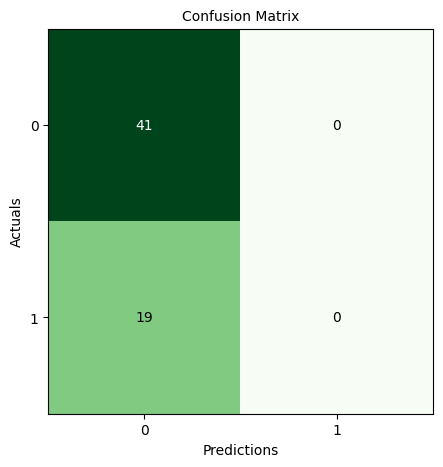

In [56]:
# plot a confusion matrix
fig, ax = plot_confusion_matrix(conf_mat=cmat, figsize=(5, 5), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=10)
plt.ylabel('Actuals', fontsize = 10)
plt.title('Confusion Matrix', fontsize = 10)
plt.show()

In [57]:
auc = roc_auc_score(y_test, y_pred_a)
print('AUC: %f' %auc)

AUC: 0.500000


In [60]:
#save the model
model.save('mortality_heart_failure_model')

INFO:tensorflow:Assets written to: mortality_heart_failure_model\assets


INFO:tensorflow:Assets written to: mortality_heart_failure_model\assets


In [63]:
##save the NN Model
import pickle # file that contains binary representation

##save the model to a file
with open ('neural_network_model.pkl','wb') as file:
    pickle.dump(train_nn, file)